In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def combinations (n: int, k: int) -> int:
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

__Задача 1__

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании.  Найдите M(X), D(X).

A - кол-во правильных ответов. Кол-во вопросов - $n=5$. Вероятность выбрать правильный ответ $p=\frac{1}{4}$

Вероятность вычислим по формуле Бернули:
\begin{equation}\label{eq:solv}
P(X = k) = C_n^k * (1 - p)^{n-k} * p^k = C_5^k * (3/4)^{5-k} * (1/4)^k
\end{equation}

Тогда получаем, что:

$P(X=5)=C_5^5 * (3/4)^{0} * (1/4)^{5}$

In [5]:
P_5 = combinations(5,5) * (3/4)**0 * (1/4)**5
P_5

0.0009765625

$P(X=4)=C_5^4 * (3/4)^{1} * (1/4)^{4}$

In [6]:
P_4 = combinations(5,4)*(3/4)**1 * (1/4)**4
P_4

0.0146484375

$P(X=3)=C_5^3 * (3/4)^{2} * (1/4)^3$

In [7]:
P_3 = combinations(5,3)*(3/4)**2 * (1/4)**3
P_3

0.087890625

$P(X=2)=C_5^2 * (3/4)^{3} * (1/4)^2$

In [8]:
P_2 = combinations(5,2)*(27/64) * (1/4)**2
P_2

0.263671875

$P(X=1)=C_5^1 * (3/4)^{4} * (1/4)^1$

In [9]:
P_1 = combinations(5,1)*(3/4)**4 * (1/4)**1
P_1

0.3955078125

$P(X=0)=C_5^0 * (3/4)^{5} * (1/4)^0$

In [10]:
P_0 = combinations(5,0)*(3/4)**5 * (1/4)**0
P_0

0.2373046875

In [13]:
prob = [P_0,P_1,P_2,P_3,P_4,P_5]
prob

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]

In [14]:
n=5
p=0.25

In [18]:
def proba(k: int) -> float:
    return combinations(n, k)*(p**k)*((1-p)**(n-k))

In [19]:
x_values = np.arange(0,n+1)
print(x_values)

[0 1 2 3 4 5]


In [20]:
x_probas = np.array([proba(value) for value in x_values])
print(x_probas)

[0.23730469 0.39550781 0.26367188 0.08789062 0.01464844 0.00097656]


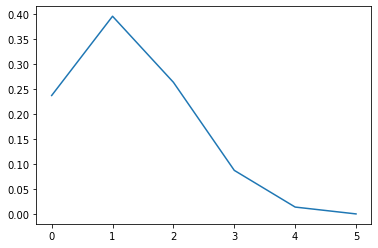

In [21]:
plt.plot(x_values,x_probas)

\begin{equation}\label{eq:solv}
M(X)=np  
\end{equation}

\begin{equation}\label{eq:solv}
D(X)=np(1-p)  
\end{equation}

In [20]:
M_X=5*1/4
M_X

1.25

In [23]:
m = x_values.dot(x_probas)
m

1.25

In [21]:
D_X=5*1/4*3/4
D_X

0.9375

In [24]:
y_values =(x_values-m)**2
d =y_values.dot(x_probas)
d

0.9375

__Задача 2__

Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

X - число попаданий в цель. Искомую вероятность будем находить через теорему Пуассона. По теореме сложения вероятностей:

$P(5<=X<=10)=P(X=5)+P(X=6)+....+P(X=10)$

$λ=np=200 * 0.01=2$

$e^{-2}$ примерно равно $0.135$

 $P(5<=X<=10)= 0.135 * (\frac{2^5}{5!}+\frac{2^6}{6!}+\frac{2^7}{7!}+\frac{2^8}{8!}+\frac{2^9}{9!}+\frac{2^{10}}{10!})$

In [37]:
P=0
i=int
for i in range(5,11):
    P_i = 2**i/np.math.factorial(i)
    P+=P_i
P*0.135

0.05251428571428572

In [25]:
a = 2

In [26]:
def proba(k: int) -> float:
    return (a**k)* np.exp(-a)/np.math.factorial(k)

In [27]:
P = sum(proba(k) for k in range(5,11))
P

0.052644709119342686

__Задача 3__

В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание?

Подсказка. Как посчитать P(X >= k) для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

Надо найти n, если P(X>=10)=0.9, p=0.01

$0.9=e^{-n*0.01}*\frac{2^{10}}{10!}$

In [28]:
round(*np.math.e**(-0.9/2**10*np.math.factorial(10))/(-0.01))


TypeError: round() argument after * must be an iterable, not float

__несовместные можно +, 
независимые можно *__

__Решение__

Вся задача упирается в то, чтобы научиться считать вероятность $P(X \geq k)$ для величины $X$, имеющей распределение Пуассона. Мы знаем, что
$$P(X = k) = \dfrac{a^k e ^{-a}}{k!}.$$

In [29]:
def poisson_proba(a: float, k: int) -> float:
    return (a ** k) * np.exp(-a) / np.math.factorial(k)

In [30]:
poisson_proba(a=2, k=170)

2.7907973649004e-257

Теперь чтобы посчитать $𝑃(𝑋≥𝑘)$, достаточно лишь просуммировать все вероятности $𝑃(𝑋=𝑘0)$ для всех $𝑘0≥𝑘$. Проблема лишь в том, что таких 𝑘0 бесконечное число. Поэтому пойдём другим путём: научимся считать $𝑃(𝑋<𝑘)$. Тогда мы сможем получить $𝑃(𝑋≥𝑘)$ как $1−𝑃(𝑋<𝑘)$.

In [31]:
def poisson_proba_le(a: float, k: int) -> float:
    return sum(poisson_proba(a, k0) for k0 in range(k))

Наконец, посчитаем искомую вероятность.


In [32]:
def poisson_proba_geq(a: float, k: int) -> float:
    return 1 - poisson_proba_le(a, k)

На всякий случай, проверим себя: вероятность $P(X \geq 0)$ должна быть равна $1$.

In [33]:
poisson_proba_geq(2, 0)

1

Итак, теперь вернёмся к нашей задаче. Вероятность попадания при однократном выстреле равна $0.01$. Интуитивно ясно, что при количестве выстрелов менее $100$ уверенность $0.9$ в по меньшей мере $10$ попаданиях мы не получим. Поэтому нужно пробовать большее число выстрелов. Поскольку число выстрелов достаточно велико, мы можем достаточно точно оценить параметр $a$ с помощью биномиального распределения: $a = np$.

Остаётся лишь посмотреть, какова вероятность $P(X \geq 10)$ при различном числе выстрелов.

In [38]:
p = 0.01
k = 10

param_n = np.arange(100, 20000)

for n in param_n:
    a = n * p
    
    proba = poisson_proba_geq(a, k)
    
    if n % 200 == 0:
        print(f'{n}\t{proba}')
    
    if proba >= 0.9:
        break
    
print(f'n = {n}')
print(f'proba = {proba}')

200	4.6498075017109564e-05
400	0.00813224279693403
600	0.08392401699487573
800	0.28337574127298915
1000	0.5420702855281477
1200	0.7576078383294876
1400	0.890600630357261
n = 1421
proba = 0.9001760722984115
